# Lecture 6: Training II

![](https://www.tensorflow.org/images/colab_logo_32px.png)
[Run in colab](https://colab.research.google.com/drive/18org-B5m6ZtN7E9GBSoLtkXb6-Fc2bgh)

In [3]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("D%Y%m%dT%H%M%S"))

Last executed: D20220121T204616


## Stochastic gradient descent

### Problems with batch gradient descent

- Uses the entire training set to compute gradients at every step (slow when the training set is large).

- Full training set needs to be held in memory.

### Properties of stochastic gradient descent

- Uses a (random) single instance from the training set to compute gradients at each iteration (fast since very little data considered for each iteration).
- Only one instance of training data then needs to be held in memory.
- Less regular than batch gradient descent.
  - Helps to escape local minima.
  - Ends up close to a minimum but continues to explore vacinity around minimum ("bounces" around).

### Simulated annealing

To mitigate issue of bouncing around minimum, can reduce learning rate as algorithm proceeds.

Called *simulated annealing* by analogy with annealing in metallurgy.

*Learning schedule* defines how learning rate changes over time.

- If learning rate reduces too quickly, may get stuck on local minimum or end up frozen half-way to minimum.
- If learning rate reduces too slowly, may jump around minimum for long time.

#### Example learning schedule

Set learning rate $\alpha$ at iteration $t$ by

$$\alpha(t) = \frac{t_0}{t + t_1},$$

where $t_0$ and $t_1$ are parameters.

### Stochastic gradient descent example

In [2]:
# Common imports
import os
import numpy as np
np.random.seed(42) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#### Set up training data (repeating example from previous lecture)

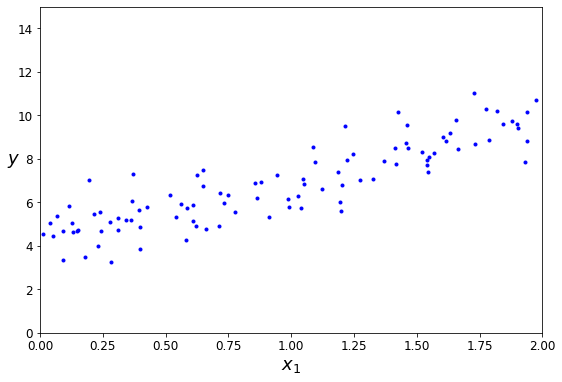

In [3]:
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
plt.figure(figsize=(9,6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]);

#### Add bias terms

In [4]:
X_b = np.c_[np.ones((m, 1)), X]         # add x0 = 1 to each instance
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

#### Solve by SGD with learning schedule

In [5]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

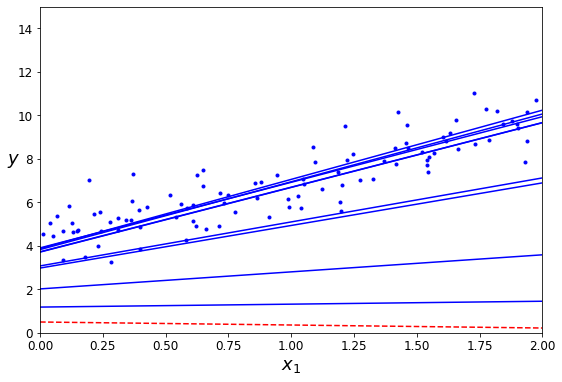

In [6]:
plt.figure(figsize=(9,6))
for epoch in range(n_epochs):
    for i in range(m):
        
        # Plot current model
        if epoch == 0 and i < 10:                   
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        
        # SGD update
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_schedule(epoch * m + i)        
        theta = theta - alpha * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15]);

In [7]:
theta

array([[4.21076011],
       [2.74856079]])

Use only 50 passes over the data, compared to 1000 for batch gradient descent.

**Exercises:** *You can now complete Exercise 1 in the exercises associated with this lecture.*

## Mini-batch gradient descent


Use *mini-batches* of small random sets of instances of training data.

Trades off properties of batch GD and stochastic GD.

Can get a performance boost over SGD by exploiting hardware optimisation for matrix operations, particuarly for GPUs.

### Shuffling training data

First step is to randomly shuffle or reorder data-set since do not want to be sensitive to ordering of data (want mini-batch considered to be representative).

**Exercises:** *You can now complete Exercise 2 in the exercises associated with this lecture.*

## Comparing gradient descent algorithms

### Repeat batch gradient descent from previous lecture

In [8]:
theta_path_bgd = []

def plot_gradient_descent(theta, alpha, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - alpha * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)

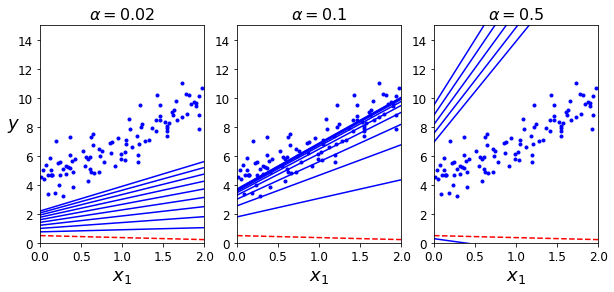

In [9]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, alpha=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, alpha=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, alpha=0.5)

### Convert lists to numpy arrays

In [10]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)

### Algorithm trajectories

(2.5, 4.5, 2.3, 3.9)

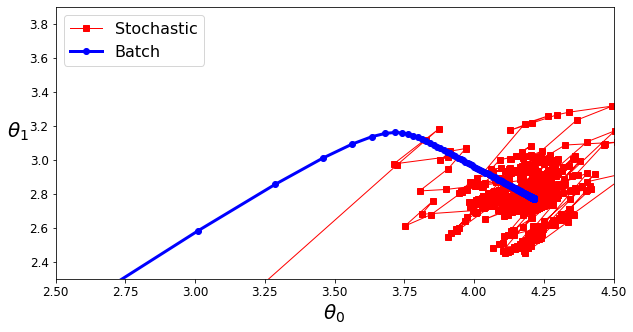

In [11]:
plt.figure(figsize=(10,5))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

We finally show the full trajectory for all optimisation methods, including mini-batch gradient descent (computed in exercises).

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture06_Images/algorithm_trajectories.png" alt="trajectories" style="height: 400px;"/>